# Import library

In [146]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import datasketch   
from tqdm import tqdm

import nltk

# Import Dataset(The dataset after preprocessing)

In [147]:
print(os.getcwd())
path = os.path.abspath(os.path.join(os.getcwd(), "../data"))
print(path)
data = pd.read_csv(path + '/data_after_text_preprocessing.csv',index_col='id')

/Users/yusuke_sugihara/DA_Project1/DataAnalytics/Quora-question-pair-similarity
/Users/yusuke_sugihara/DA_Project1/DataAnalytics/data


# Preprocessing and Exploratory Data Analysis(Simple ver.)

In [148]:
print(data.shape)
print(data.head())
print(data[data["is_duplicate"] == 1].shape)
print(data[data["is_duplicate"] == 0].shape)

(404287, 8)
    qid1  qid2                                          question1  \
id                                                                  
0      1     2  what is the step by step guide to invest in sh...   
1      3     4  what is the story of kohinoor  koh i noor  dia...   
2      5     6  how can i increase the speed of my internet co...   
3      7     8  why am i mentally very lonely  how can i solve...   
4      9    10  which one dissolve in water quikly sugar  salt...   

                                            question2  is_duplicate  \
id                                                                    
0   what is the step by step guide to invest in sh...             0   
1   what would happen if the indian government sto...             0   
2   how can internet speed be increased by hacking...             0   
3   find the remainder when  math 23  24   math  i...             0   
4             which fish would survive in salt water              0   

    wo

In [149]:
print(data.sample(10, random_state=42))

          qid1    qid2                                          question1  \
id                                                                          
8067     15738   15739                 how do i play pokémon go in korea    
224279  332326  332327           will a breathing treatment help a cough    
252452  336023  366789      is kellyanne conway annoying in your opinion    
174039  268330  268331   how do you rate  1 10  and review maruti baleno    
384863   28901  233483             what are some good books on marketing    
182965    1120    7681  what can be the medium budget to visit best pl...   
199717  301285  301286  a boy rufused me  how can i continue to keep t...   
343232  471320  127014           how many hindu nations are in the world    
91165   152829  152830  what are the economic advantages of cashless p...   
110222  158902  125399       why cant i get a credit card with no credit    

                                                question2  is_duplicate  \


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   qid1          404287 non-null  int64  
 1   qid2          404287 non-null  int64  
 2   question1     404273 non-null  object 
 3   question2     404283 non-null  object 
 4   is_duplicate  404287 non-null  int64  
 5   word_common   404287 non-null  float64
 6   word_total    404287 non-null  float64
 7   word_share    404287 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 27.8+ MB


In [151]:
data[data.isnull().any(axis=1)]

,qid1,qid2,question1,question2,is_duplicate,word_common,word_total,word_share
id,,,,,,,,
3306,6553,6554,NaN,why is cornell own endowment the lowest in the...,0,0.0,10.0,0.0
13016,25026,25027,NaN,why should one not work at google,0,0.0,8.0,0.0
20072,37898,37899,how could i solve this,NaN,0,0.0,6.0,0.0
20794,39204,39205,NaN,what is the gmail tech support help phone number,0,0.0,10.0,0.0
47056,84067,84068,is there anywhere in the world offering pain m...,NaN,0,0.0,19.0,0.0
96725,161071,161072,NaN,who are moses noah and exodus,0,0.0,7.0,0.0
104101,171925,171926,NaN,problem of solving a problem is not a problem ...,0,0.0,18.0,0.0
134403,214814,214815,NaN,what is your take on the undercover report tha...,0,0.0,24.0,0.0
189659,161071,288480,NaN,who is noah,0,0.0,4.0,0.0


In [152]:
data = data.dropna(how="any").reset_index(drop=True)
data.shape

(404269, 8)

In [153]:
data['is_duplicate'].value_counts()

0    255006
1    149263
Name: is_duplicate, dtype: int64

<Axes: >

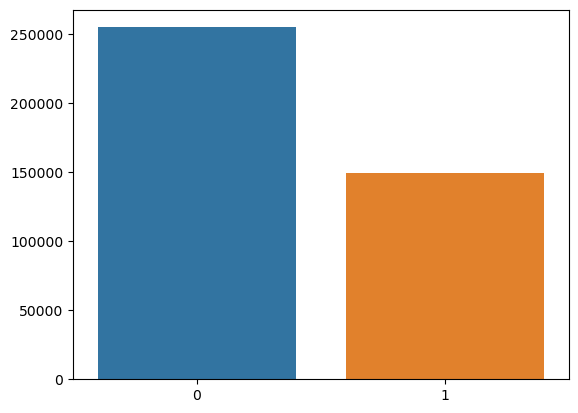

In [154]:
ct = data['is_duplicate'].value_counts()
sns.barplot(x=ct.index,y=ct.values)

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data[['question1', 'question2']]
y = data['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train[:1000]
y_train = y_train[:1000]
# print(data.head())
print(X_train.head())
print(X_train.shape)
print(y_train.head())
print(y_train.shape)
print(X_test.shape)

                                                question1  \
360865  is it bad to sleep on your left side all the t...   
71770   why does not the quora app introduce an option...   
134765                          how do i clone a website    
302549        can people actively control their emotions    
100578  what were some of mother teresa own contributi...   

                                                question2  
360865          is it harmful to sleep on your left side   
71770   why does not the quora mobile app have an offl...  
134765                        how do you clone a website   
302549    how can i control my bad feelings and emotions   
100578  what is mother teresa own greatest accomplishm...  
(1000, 2)
360865    0
71770     1
134765    1
302549    1
100578    1
Name: is_duplicate, dtype: int64
(1000,)
(121281, 2)


In [156]:
com_data_train = X_train['question1'].append(X_train['question2']).reset_index()
print(com_data_train.head())


    index                                                  0
0  360865  is it bad to sleep on your left side all the t...
1   71770  why does not the quora app introduce an option...
2  134765                          how do i clone a website 
3  302549        can people actively control their emotions 
4  100578  what were some of mother teresa own contributi...


/var/folders/11/4w81_8697d9g_9c3944_ytwh0000gn/T/ipykernel_83485/3115984954.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  com_data_train = X_train['question1'].append(X_train['question2']).reset_index()


In [157]:
com_data_train.drop(['index'],axis=1,inplace=True)
com_data_train.columns = ['question']
print(com_data_train.head())

                                            question
0  is it bad to sleep on your left side all the t...
1  why does not the quora app introduce an option...
2                          how do i clone a website 
3        can people actively control their emotions 
4  what were some of mother teresa own contributi...


In [158]:
print(com_data_train.shape)

(2000, 1)


## Making a dictionary mapping a question to its duplicate question

In [159]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from datasketch import MinHash, MinHashLSH
from tqdm import tqdm

In [160]:
# Create a dictory of all dupllcated questions.
correct = X_train[y_train==1]
correct_dict = {}
for x,y in zip(correct['question1'],correct['question2']):
    if correct_dict.get(x)==None:
        correct_dict[x] = [y]
    else:
        correct_dict[x].append(y)
        correct_dict[x] = [i for i in set(correct_dict[x])]
for x,y in zip(correct['question2'],correct['question1']):
    if correct_dict.get(x)==None:
        correct_dict[x] = [y]
    else:
        correct_dict[x].append(y)
        correct_dict[x] = [i for i in set(correct_dict[x])]

## Set Representation

In [161]:
set_dict={} # maps question to set representation of question
norm_dict={} # maps question id (eg 'm1') to actual question. We may use this dictionary to evaluate results of LSH output.
count=1

for question in tqdm([x for x in com_data_train['question'] if type(x)==str]):
    temp_list = []
    for shingle in question.split(' '): # shingle is a word
        if shingle not in stop_words:
            temp_list.append(shingle.lower())
    set_dict["m{}".format(count)] = set(temp_list)
    norm_dict["m{}".format(count)] = question
    count +=1

100%|██████████| 2000/2000 [00:00<00:00, 263205.05it/s]


In [162]:
set_dict['m1']

{'', 'bad', 'left', 'side', 'sleep', 'time'}

In [163]:
norm_dict['m1']

'is it bad to sleep on your left side all the time '

In [164]:
# set_dict.values()

## Create minHash signatures

In [165]:
num_perm = 10
min_dict = {} # maps question to "min hash signatures"
count2 = 1
for val in tqdm (set_dict.values()): 
    m = MinHash(num_perm=num_perm)
    for shingle in val:
        m.update(shingle.encode('utf8'))
    min_dict["m{}".format(count2)] = m
    count2+=1
print(min_dict['m1'].hashvalues)

100%|██████████| 2000/2000 [00:00<00:00, 4816.89it/s]

[ 83723099  39478371 705304245  69861131  27338559 837534467 460834131
  10909748 860422184  85655049]


In [166]:
# # toy example

# set1 = set(['minhash', 'is', 'a', 'probabilistic', 'data', 'structure', 'for',
#             'estimating', 'the', 'similarity', 'between', 'datasets'])
# set2 = set(['minhash', 'is', 'a', 'probability', 'data', 'structure', 'for',
#             'estimating', 'the', 'similarity', 'between', 'documents'])
# set3 = set(['minhash', 'is', 'probability', 'data', 'structure', 'for',
#             'estimating', 'the', 'similarity', 'between', 'documents'])

# m1 = MinHash(num_perm=10)
# m2 = MinHash(num_perm=10)
# m3 = MinHash(num_perm=10)
# for d in set1:
#     m1.update(d.encode('utf8'))
# print(m1.hashvalues)
# for d in set2:
#     m2.update(d.encode('utf8'))
# for d in set3:
#     m3.update(d.encode('utf8'))


## Create LSH index

In [167]:
lsh = MinHashLSH(threshold=0.6, num_perm=num_perm)
for key in tqdm(min_dict.keys()):
    lsh.insert(key,min_dict[key])

100%|██████████| 2000/2000 [00:00<00:00, 144603.75it/s]


In [168]:
def create_cand_pairs():
    big_list = []
    for query in min_dict.keys():
        bucket = lsh.query(min_dict[query])
        if len(bucket)==1:
            big_list.append([bucket[0],"None"])
        if len(bucket)>1:
            first_val = bucket[0]
            for val in bucket[1:]:
                second_val = val
                big_list.append([first_val,second_val])
    return big_list

In [169]:
cand_pairs = create_cand_pairs()
print(cand_pairs[:10])

[['m1', 'None'], ['m2', 'None'], ['m3', 'm1003'], ['m4', 'None'], ['m5', 'None'], ['m6', 'None'], ['m7', 'None'], ['m8', 'm1008'], ['m9', 'None'], ['m10', 'None']]


In [170]:
def evaluation(cand_pairs):
    tp = 0 # true positive
    fp = 0 # false positive
    fn = 0 # false negatives
    for pair in cand_pairs:
        if pair[1] == "None":
            if str(norm_dict[pair[0]]) in correct_dict.keys():
                    fn +=1
        else:
            if isinstance(correct_dict.get(norm_dict[pair[0]]), (list,)):
                if norm_dict[pair[1]] in correct_dict.get(norm_dict[pair[0]]):
                    tp +=1
                else:
                    fp +=1
                    
    precision = tp/(fp+tp)
    recall = tp/(fn+tp)
    print ('precision is {:.2f}'.format(precision))
    print ('recall is {:.2f}'.format(recall))

In [171]:
evaluation(cand_pairs)

precision is 0.32
recall is 0.52
